In [1]:
# IMPORT LIBRARY
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from bayes_opt import BayesianOptimization
from imblearn.combine import SMOTETomek
from sklearn.impute import KNNImputer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load Dataset

file = ('stroke_dataset.csv')
data = pd.read_csv(file)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#MISSING VALUE KNN
imputer = KNNImputer(n_neighbors=5)  
data[['bmi']] = imputer.fit_transform(data[['bmi']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# cek duplikasi data
data.duplicated().sum()

np.int64(0)

In [5]:
# Cek apakah masih ada missing value
print(data.isnull().sum())


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [6]:
# cek isian dari dataset

# gender
print(data['gender'].unique())

# worktype
print(data['work_type'].unique())

# Residence Type
print(data['Residence_type'].unique())

# Smoking Status
print(data['smoking_status'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
# Menggahapus Nilai "Other" pada kolom gender
data = data[data['gender'] != 'Other']
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

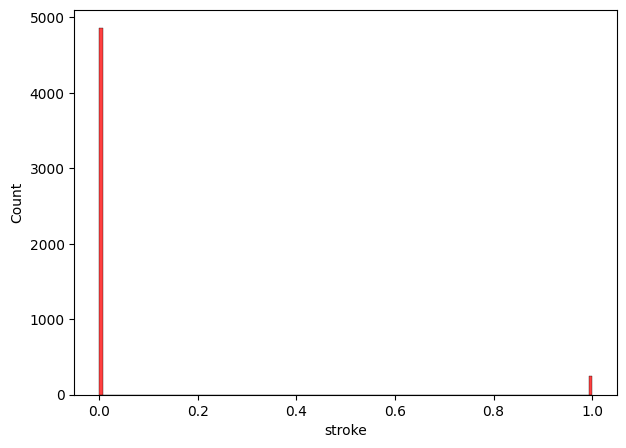

stroke
0    4860
1     249
Name: count, dtype: int64


In [8]:
# cek keseimbangan data
fig, axes = plt.subplots(1,1,figsize=(7,5))

sns.histplot(data = data, x='stroke', color = 'red')
plt.show()
print (data['stroke'].value_counts())

In [9]:
# Sebelum menyeimbangan Data ada beberapa tahapan lagi

#1. hapus kolom tidak berguna seperti ID
data.drop('id', axis=1, inplace=True)

#2. Transformasi Data menggunakan Label encoder
d_list = data.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for i in d_list:
    le.fit(data[i])
    data[i] = le.transform(data[i])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2716\583359724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('id', axis=1, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2716\583359724.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = le.transform(data[i])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2716\583359724.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [10]:
# cek info dataset setelah transformasi
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.0 KB


In [11]:
# Mengubah type data age menjadi INT 
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 479.0 KB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2716\2919376904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)


In [12]:
# Mengubah type data age menjadi INT 
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 479.0 KB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2716\2919376904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)


In [13]:
# MENENTUKAN LABEL PADA DATASET

X = data.drop('stroke', axis=1)
y = data['stroke']

In [14]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle=True)

In [15]:
# Penyeimbangan Data
balanced = SMOTETomek(random_state=42)

X_resampled, y_resampled = balanced.fit_resample(X, y)

# Cek Jumlah Variabel X dan y Sebelum dan sesudah 
print('Jumlah sampel sebelum hybrid = ', len(X))
print('Jumlah sampel sesudah hybrid = ', len(X_resampled))

Jumlah sampel sebelum hybrid =  5109
Jumlah sampel sesudah hybrid =  9656


In [16]:
# Buat Menjadi Data Frame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)
resampled_data.to_csv('dataset_balanced_knn_smotomek.csv', index=False)

In [17]:
# melihat apakah dataset sudah seimbang

data = pd.read_csv('dataset_balanced_knn_smotomek.csv')

data['stroke'].value_counts()

stroke
1    4828
0    4828
Name: count, dtype: int64

In [18]:
# Pemilihan Variabel Bebas dan independent dari data yang sudah diseimbangakan
X = data.drop('stroke', axis=1)
y = data['stroke']

In [19]:
# BASE MODEL 
model = AdaBoostClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=100, algorithm="SAMME", random_state=42
)

In [20]:
# BASE MODEL - TRAINING
model.fit(X_train, y_train) # MODEL BELAJAR DARI DATA!


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


,estimator,RandomForestC...ndom_state=42)
,n_estimators,100
,learning_rate,1.0
,algorithm,'SAMME'
,random_state,42
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [21]:
#  BASE MODEL - PREDICTION  
pred = model.predict(X_test)       # MODEL MENCARI DIAGNOSA BARU!


In [22]:
#  BASE MODEL - EVALUATION
print(model.score(X_test, y_test)) # CEK AKURASI MODEL!

0.9373776908023483


Confusion Matrix:
[[958   2]
 [ 62   0]]


<Axes: >

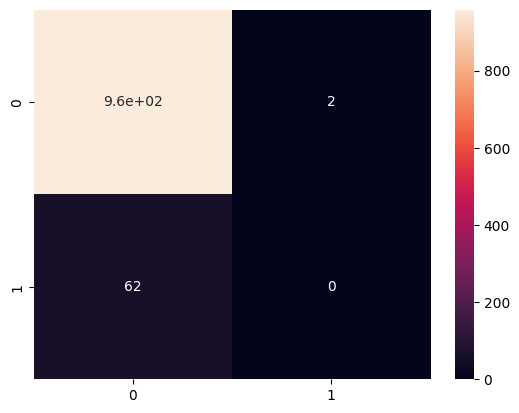

In [23]:
# IMPORT LIB
from sklearn.metrics import confusion_matrix, classification_report

#  CONFUSION MATRIX 
cn = confusion_matrix(y_test, pred) # Menghitung: Benar vs Salah prediksi
print("Confusion Matrix:")
print(cn)
#  VISUALISASI  
sns.heatmap(cn, annot=True) # Gambar matrix dengan angka-angka

In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [25]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek

pipeline = Pipeline([
    ('model', RandomForestClassifier(
        class_weight={0: 1, 1: 5},
        max_depth=10,
        n_estimators=200,
        random_state=42
    ))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None],
    'model__class_weight': [{0:1, 1:5}, 'balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    error_score='raise'   # untuk debug
)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)


In [26]:
print("Best Params:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Params: {'model__class_weight': 'balanced_subsample', 'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.23      0.31      0.26        62

    accuracy                           0.90      1022
   macro avg       0.59      0.62      0.60      1022
weighted avg       0.91      0.90      0.90      1022



SHAP

In [27]:
best_model = grid_search.best_estimator_.named_steps['model']

print("Best Params:", grid_search.best_params_)

Best Params: {'model__class_weight': 'balanced_subsample', 'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 200}


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Bentuk shap_values: <class 'numpy.ndarray'> shape = (10, 2)


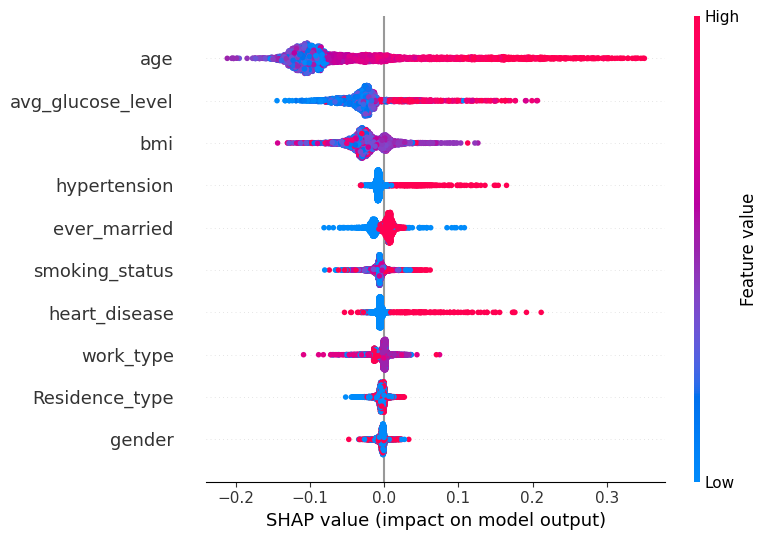

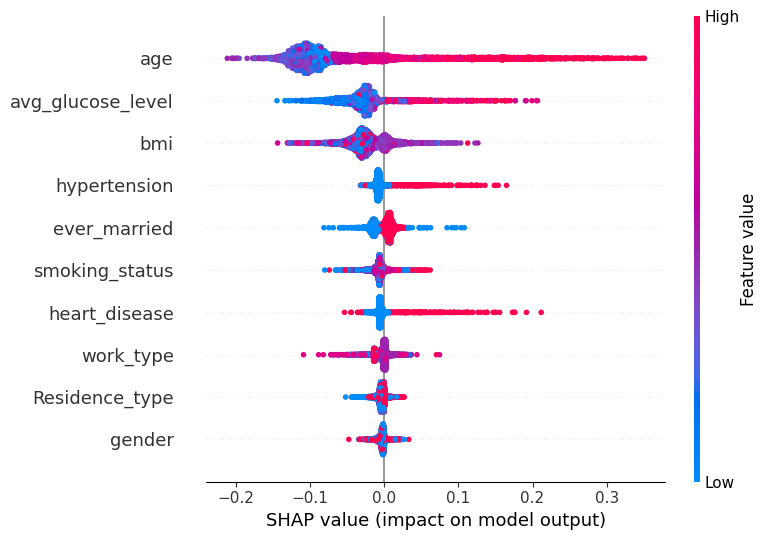

In [28]:
import shap

pipeline.fit(
    X_train,
    y_train)

rf_model = pipeline.named_steps['model']

explainer = shap.TreeExplainer(
    rf_model)

shap_values = explainer.shap_values(
    X_train)

print("Bentuk shap_values:", type(shap_values), "shape =", shap_values[1].shape)

shap_class1 = shap_values[:, :, 1]
shap.summary_plot(
    shap_class1, 
    X_train, 
    feature_names=X_train.columns)

shap.summary_plot(
    shap_class1,
    X_train,
    feature_names=X_train.columns,
    show=True
)


In [29]:
import joblib
joblib.dump(grid_search.best_estimator_, 'stroke_model.pkl')


['stroke_model.pkl']